Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

Mounting Google Drive on Colab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

Reading UK Road Accident(1979-2020) data as csv

In [ ]:
#Loading actual dataset from 1979-2020
df=pd.read_csv('drive/MyDrive/CA683_Project/uk_road_accident.csv')
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,197901A11AD14,1979,01A11AD14,NaN,NaN,NaN,NaN,1,3,2,...,-1,1,8,1,-1,0,-1,-1,-1,-1
1,197901A1BAW34,1979,01A1BAW34,198460.0,894000.0,NaN,NaN,1,3,1,...,-1,4,8,3,-1,0,-1,-1,-1,-1
2,197901A1BFD77,1979,01A1BFD77,406380.0,307000.0,NaN,NaN,1,3,2,...,-1,4,8,3,-1,0,-1,-1,-1,-1
3,197901A1BGC20,1979,01A1BGC20,281680.0,440000.0,NaN,NaN,1,3,2,...,-1,4,8,3,-1,0,-1,-1,-1,-1
4,197901A1BGF95,1979,01A1BGF95,153960.0,795000.0,NaN,NaN,1,2,2,...,-1,4,3,3,-1,0,-1,-1,-1,-1


In [ ]:
#Checking unique values of accident_year
df['accident_year'].unique()

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
#Applying condition and considering only those datapoints which has year greater or eual to 2010.
df=df.loc[df['accident_year'] >=2010]
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
7128354,201001BS70003,2010,01BS70003,527580.0,177730.0,-0.164002,51.484087,1,3,2,...,0,1,8,2,0,0,1,1,2,E01002900
7128355,201001BS70004,2010,01BS70004,525340.0,180470.0,-0.195273,51.509212,1,3,1,...,5,4,2,2,0,0,1,1,2,E01002884
7128356,201001BS70006,2010,01BS70006,524800.0,180300.0,-0.203110,51.507804,1,3,2,...,5,1,1,1,0,0,1,1,2,E01002871
7128357,201001BS70007,2010,01BS70007,525080.0,180920.0,-0.198858,51.513314,1,3,2,...,0,4,1,1,0,0,1,1,2,E01002886
7128358,201001BS70008,2010,01BS70008,526760.0,177740.0,-0.175802,51.484361,1,3,2,...,0,4,1,2,0,0,1,1,2,E01002845


In [ ]:
#Resetting the index
df.reset_index(drop=True)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,201001BS70003,2010,01BS70003,527580.0,177730.0,-0.164002,51.484087,1,3,2,...,0,1,8,2,0,0,1,1,2,E01002900
1,201001BS70004,2010,01BS70004,525340.0,180470.0,-0.195273,51.509212,1,3,1,...,5,4,2,2,0,0,1,1,2,E01002884
2,201001BS70006,2010,01BS70006,524800.0,180300.0,-0.203110,51.507804,1,3,2,...,5,1,1,1,0,0,1,1,2,E01002871
3,201001BS70007,2010,01BS70007,525080.0,180920.0,-0.198858,51.513314,1,3,2,...,0,4,1,1,0,0,1,1,2,E01002886
4,201001BS70008,2010,01BS70008,526760.0,177740.0,-0.175802,51.484361,1,3,2,...,0,4,1,2,0,0,1,1,2,E01002845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474465,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
1474466,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
1474467,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
1474468,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [ ]:
#Checking the reduced dataset with the datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474470 entries, 7128354 to 8602823
Data columns (total 36 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   accident_index                               1474470 non-null  object 
 1   accident_year                                1474470 non-null  int64  
 2   accident_reference                           1474470 non-null  object 
 3   location_easting_osgr                        1474320 non-null  float64
 4   location_northing_osgr                       1474320 non-null  float64
 5   longitude                                    1474310 non-null  float64
 6   latitude                                     1474310 non-null  float64
 7   police_force                                 1474470 non-null  int64  
 8   accident_severity                            1474470 non-null  int64  
 9   number_of_vehicles                      

In [ ]:
#Dropping such records which are empty/null across each column
df=df.dropna(how='any', axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474273 entries, 7128354 to 8602823
Data columns (total 36 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   accident_index                               1474273 non-null  object 
 1   accident_year                                1474273 non-null  int64  
 2   accident_reference                           1474273 non-null  object 
 3   location_easting_osgr                        1474273 non-null  float64
 4   location_northing_osgr                       1474273 non-null  float64
 5   longitude                                    1474273 non-null  float64
 6   latitude                                     1474273 non-null  float64
 7   police_force                                 1474273 non-null  int64  
 8   accident_severity                            1474273 non-null  int64  
 9   number_of_vehicles                      

In [ ]:
#Saving the reduced dataset on drive in order to avoid loading such huge dataset again and again!!
df.to_csv("drive/MyDrive/CA683_Project/uk_road_accident2010-2020.csv")

In [17]:
#Loading dataset of 2010-2020 from drive
acc=pd.read_csv('drive/MyDrive/CA683_Project/uk_road_accident2010-2020.csv')
acc.head()

,Unnamed: 0,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,7128354,201001BS70003,2010,01BS70003,527580.0,177730.0,-0.164002,51.484087,1,3,...,0,1,8,2,0,0,1,1,2,E01002900
1,7128355,201001BS70004,2010,01BS70004,525340.0,180470.0,-0.195273,51.509212,1,3,...,5,4,2,2,0,0,1,1,2,E01002884
2,7128356,201001BS70006,2010,01BS70006,524800.0,180300.0,-0.203110,51.507804,1,3,...,5,1,1,1,0,0,1,1,2,E01002871
3,7128357,201001BS70007,2010,01BS70007,525080.0,180920.0,-0.198858,51.513314,1,3,...,0,4,1,1,0,0,1,1,2,E01002886
4,7128358,201001BS70008,2010,01BS70008,526760.0,177740.0,-0.175802,51.484361,1,3,...,0,4,1,2,0,0,1,1,2,E01002845


In [18]:
#Checking columns
acc.columns

Index(['Unnamed: 0', 'accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [19]:
#Dropping unnecessary columns
acc = acc.drop(["Unnamed: 0", "accident_index", "accident_reference", "location_easting_osgr","location_northing_osgr",
                "first_road_number", "second_road_number", "trunk_road_flag"], axis=1)
acc.head()

,accident_year,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location
0,2010,-0.164002,51.484087,1,3,2,1,11/01/2010,2,07:30,...,0,0,1,8,2,0,0,1,1,E01002900
1,2010,-0.195273,51.509212,1,3,1,1,11/01/2010,2,18:35,...,0,5,4,2,2,0,0,1,1,E01002884
2,2010,-0.203110,51.507804,1,3,2,1,12/01/2010,3,10:22,...,0,5,1,1,1,0,0,1,1,E01002871
3,2010,-0.198858,51.513314,1,3,2,1,02/01/2010,7,21:21,...,0,0,4,1,1,0,0,1,1,E01002886
4,2010,-0.175802,51.484361,1,3,2,1,04/01/2010,2,20:35,...,0,0,4,1,2,0,0,1,1,E01002845


In [20]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474273 entries, 0 to 1474272
Data columns (total 29 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   accident_year                                1474273 non-null  int64  
 1   longitude                                    1474273 non-null  float64
 2   latitude                                     1474273 non-null  float64
 3   police_force                                 1474273 non-null  int64  
 4   accident_severity                            1474273 non-null  int64  
 5   number_of_vehicles                           1474273 non-null  int64  
 6   number_of_casualties                         1474273 non-null  int64  
 7   date                                         1474273 non-null  object 
 8   day_of_week                                  1474273 non-null  int64  
 9   time                                         1

In [22]:
#Dropping missing/unknown values from some potential columns, which are going to be utilised for modeling at later stage
indexNames=acc[(acc.weather_conditions == -1) | (acc.weather_conditions == 9)].index
acc.drop(indexNames, inplace=True)
indexNames=acc[(acc.road_surface_conditions == -1) | (acc.road_surface_conditions == 9)].index
acc.drop(indexNames, inplace=True)
indexNames=acc[(acc.light_conditions == -1) | (acc.light_conditions == 9)].index
acc.drop(indexNames, inplace=True)
indexNames=acc[(acc.special_conditions_at_site == -1) | (acc.special_conditions_at_site == 9)].index
acc.drop(indexNames, inplace=True)
indexNames=acc[(acc.carriageway_hazards == -1) | (acc.carriageway_hazards == 9)].index
acc.drop(indexNames, inplace=True)
indexNames=acc[(acc.road_type == -1) | (acc.road_type == 9)].index
acc.drop(indexNames, inplace=True)
indexNames=acc[(acc.speed_limit == -1) | (acc.speed_limit == 9)].index
acc.drop(indexNames, inplace=True)
indexNames=acc[(acc.urban_or_rural_area == -1) | (acc.urban_or_rural_area == 9)].index
acc.drop(indexNames, inplace=True)
indexNames=acc[(acc.junction_detail == -1) | (acc.junction_detail == 99) | (acc.junction_detail == 9)].index
acc.drop(indexNames, inplace=True)
indexNames=acc[(acc.junction_control == -1) | (acc.junction_control == 9)].index
acc.drop(indexNames, inplace=True)
indexNames=acc[(acc.special_conditions_at_site == -1) | (acc.special_conditions_at_site == 9)].index
acc.drop(indexNames, inplace=True)
indexNames=acc[(acc.carriageway_hazards == -1) | (acc.carriageway_hazards == 9)].index
acc.drop(indexNames, inplace=True)
acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814305 entries, 0 to 1474271
Data columns (total 29 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                814305 non-null  int64  
 1   longitude                                    814305 non-null  float64
 2   latitude                                     814305 non-null  float64
 3   police_force                                 814305 non-null  int64  
 4   accident_severity                            814305 non-null  int64  
 5   number_of_vehicles                           814305 non-null  int64  
 6   number_of_casualties                         814305 non-null  int64  
 7   date                                         814305 non-null  object 
 8   day_of_week                                  814305 non-null  int64  
 9   time                                         814305 non-nu

In [23]:
#Again resetting the index
acc = acc.reset_index(drop=True)
acc.tail()

,accident_year,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location
814300,2020,-3.963841,56.016153,99,3,2,1,18/09/2020,6,12:00,...,0,0,1,1,1,0,0,2,2,-1
814301,2020,-3.944559,55.732713,99,2,3,4,16/10/2020,6,16:12,...,0,4,1,1,1,0,0,1,2,-1
814302,2020,-4.273881,55.828848,99,3,2,2,10/06/2020,4,08:08,...,0,0,1,1,1,0,0,1,2,-1
814303,2020,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,...,0,0,1,1,1,0,0,1,1,-1
814304,2020,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,...,0,0,1,1,1,0,0,1,2,-1


In [24]:
#Saving the final preprocessed dataset as csv
acc.to_csv("drive/MyDrive/CA683_Project/preprocessed_uk_road_accidents_2010-2020.csv")

In [4]:
#Now loading and reading csv file from drive
acc=pd.read_csv('drive/MyDrive/CA683_Project/preprocessed_uk_road_accidents_2010-2020.csv')
acc.head()

,Unnamed: 0,accident_year,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location
0,0,2010,-0.164002,51.484087,1,3,2,1,11/01/2010,2,...,0,0,1,8,2,0,0,1,1,E01002900
1,1,2010,-0.195273,51.509212,1,3,1,1,11/01/2010,2,...,0,5,4,2,2,0,0,1,1,E01002884
2,2,2010,-0.203110,51.507804,1,3,2,1,12/01/2010,3,...,0,5,1,1,1,0,0,1,1,E01002871
3,3,2010,-0.198858,51.513314,1,3,2,1,02/01/2010,7,...,0,0,4,1,1,0,0,1,1,E01002886
4,4,2010,-0.175802,51.484361,1,3,2,1,04/01/2010,2,...,0,0,4,1,2,0,0,1,1,E01002845


In [5]:
#Dropping unwanted columns
acc = acc.drop(["Unnamed: 0", "lsoa_of_accident_location"], axis=1)
acc.head()

,accident_year,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident
0,2010,-0.164002,51.484087,1,3,2,1,11/01/2010,2,07:30,...,6,0,0,1,8,2,0,0,1,1
1,2010,-0.195273,51.509212,1,3,1,1,11/01/2010,2,18:35,...,3,0,5,4,2,2,0,0,1,1
2,2010,-0.203110,51.507804,1,3,2,1,12/01/2010,3,10:22,...,4,0,5,1,1,1,0,0,1,1
3,2010,-0.198858,51.513314,1,3,2,1,02/01/2010,7,21:21,...,6,0,0,4,1,1,0,0,1,1
4,2010,-0.175802,51.484361,1,3,2,1,04/01/2010,2,20:35,...,3,0,0,4,1,2,0,0,1,1


In [7]:
import datetime as dt

# Exploratory Data Analysis

Time of Accident

In [8]:
#Creating acc_time dataframe for time related analysis
acc_time = acc[['date','day_of_week','time']]

In [9]:
acc_time.head()

,date,day_of_week,time
0,11/01/2010,2,07:30
1,11/01/2010,2,18:35
2,12/01/2010,3,10:22
3,02/01/2010,7,21:21
4,04/01/2010,2,20:35


In [10]:
acc_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814305 entries, 0 to 814304
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         814305 non-null  object
 1   day_of_week  814305 non-null  int64 
 2   time         814305 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.6+ MB


In [11]:
##creating the column, hour,day,month and year
#creating year column
def year(string):
    return int(string[6:10])
acc_time['year']=acc_time['date'].apply(lambda x: year(x))
#creating month column
def month(string):
    return int(string[3:5])
acc_time['month']=acc_time['date'].apply(lambda x: month(x))
#creating day column
def day(string):
    return int(string[0:2])
acc_time['day']=acc_time['date'].apply(lambda x: day(x))
#creating hour column
def hour(string):
    s=string[0:2]
    return int(s)
acc_time['hour']=acc_time['time'].apply(lambda x: hour(x))

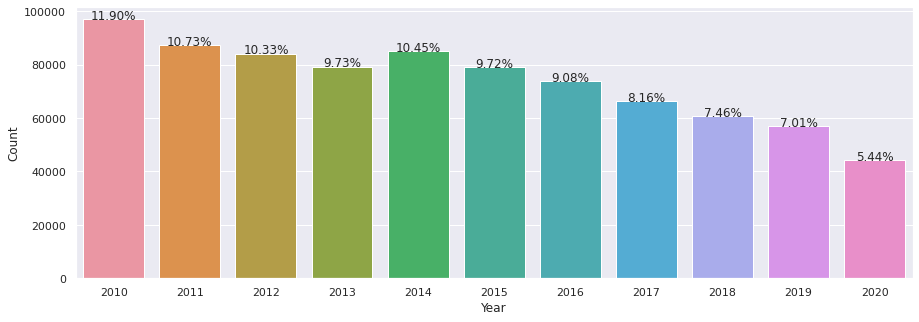

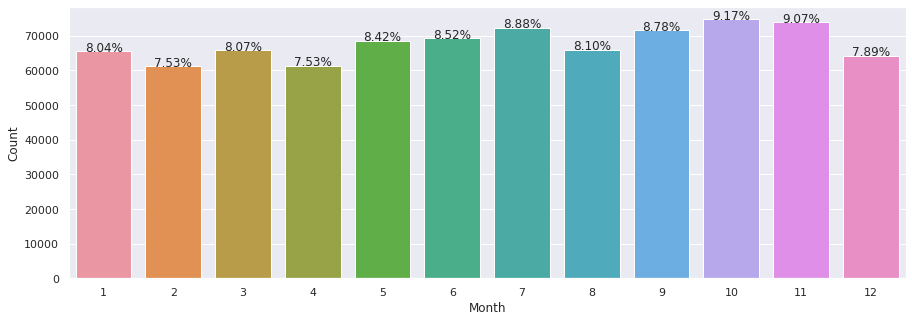

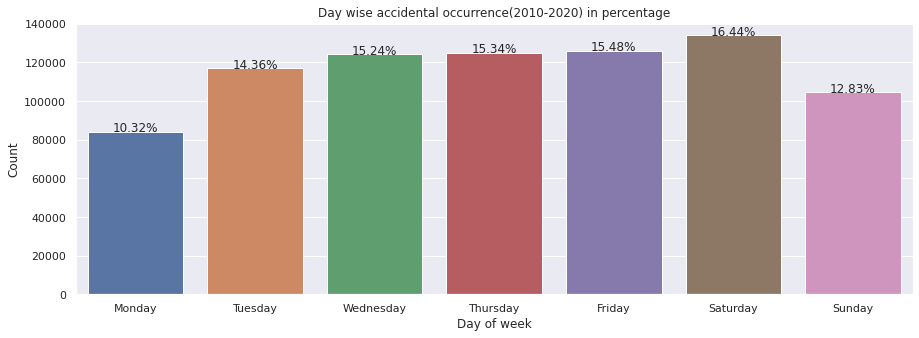

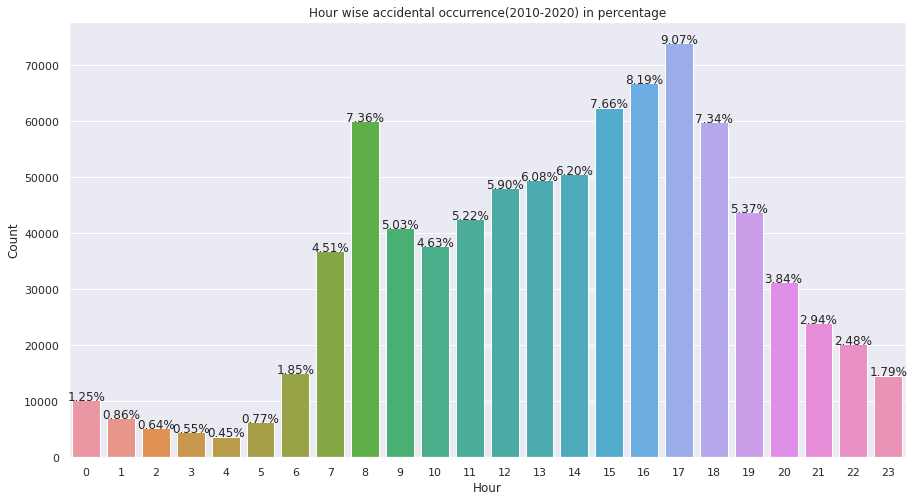

In [12]:
#Plots for day_of_week, hour, month, yearwise countplots of accidents occurred
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
yearplot = sns.countplot(x='year',data=acc_time)
yearplot.set(xlabel='Year', ylabel='Count')
for p in yearplot.patches: 
    height = p.get_height() 
    yearplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.show()
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
monthplot = sns.countplot(x='month',data=acc_time)
monthplot.set(xlabel='Month', ylabel='Count')
for p in monthplot.patches: 
    height = p.get_height() 
    monthplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.show()
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
plt.title("Day wise accidental occurrence(2010-2020) in percentage")
weekplot = sns.countplot(x='day_of_week',data=acc_time)
weekplot.set(xlabel='Day of week', ylabel='Count')
for p in weekplot.patches: 
    height = p.get_height() 
    weekplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
weekplot.set(xticklabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
plt.title("Hour wise accidental occurrence(2010-2020) in percentage")
Hourplot = sns.countplot(x='hour',data=acc_time)
Hourplot.set(xlabel='Hour', ylabel='Count')
for p in Hourplot.patches: 
    height = p.get_height() 
    Hourplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.show()

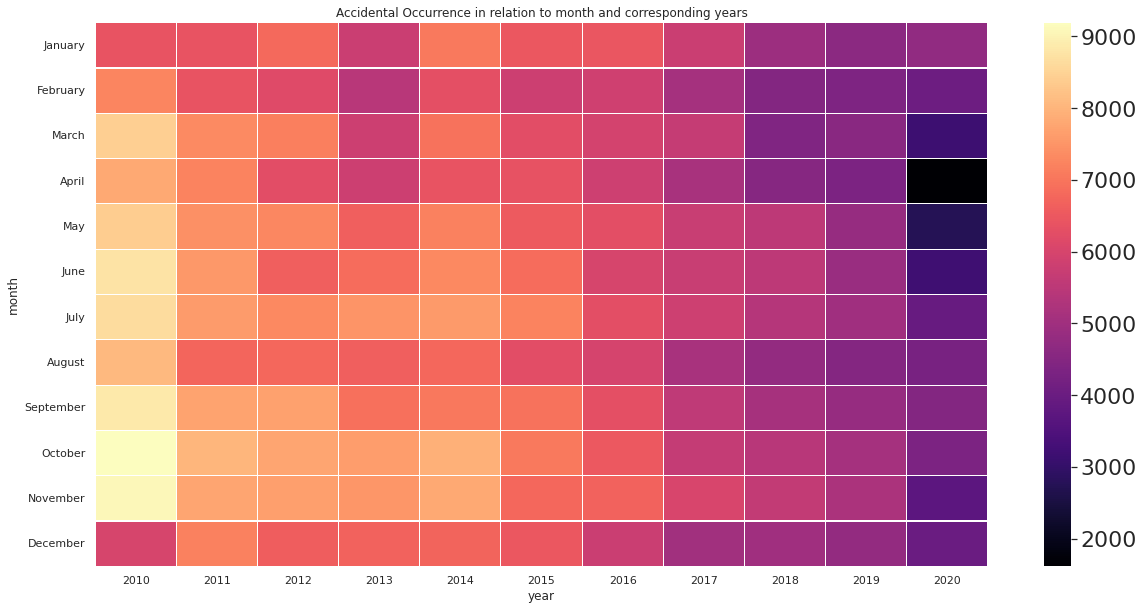

In [13]:
#Creating a pivot table to get a heatmap with the concentration of accidents by month over the years
#I decide to create a column of ones to get a count of the accidents
acc_time['ones']=1
table = pd.pivot_table(acc_time, values='ones', index=['month'],columns=['year'], aggfunc=np.sum)
plt.figure(figsize=(20,10))
plt.title('Accidental Occurrence in relation to month and corresponding years')
yticks = np.array(['January','February','March','April','May','June','July','August','September','October','November','December'])
sns.set(rc={"axes.labelsize":30},font_scale=2)
sns.heatmap(table, yticklabels=yticks,linewidths=.1,annot=False,cmap='magma')

In [14]:
#Creating a copy of dataset for other analysis
acc_copy = acc.copy()
acc_copy

,accident_year,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident
0,2010,-0.164002,51.484087,1,3,2,1,11/01/2010,2,07:30,...,6,0,0,1,8,2,0,0,1,1
1,2010,-0.195273,51.509212,1,3,1,1,11/01/2010,2,18:35,...,3,0,5,4,2,2,0,0,1,1
2,2010,-0.203110,51.507804,1,3,2,1,12/01/2010,3,10:22,...,4,0,5,1,1,1,0,0,1,1
3,2010,-0.198858,51.513314,1,3,2,1,02/01/2010,7,21:21,...,6,0,0,4,1,1,0,0,1,1
4,2010,-0.175802,51.484361,1,3,2,1,04/01/2010,2,20:35,...,3,0,0,4,1,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814300,2020,-3.963841,56.016153,99,3,2,1,18/09/2020,6,12:00,...,6,0,0,1,1,1,0,0,2,2
814301,2020,-3.944559,55.732713,99,2,3,4,16/10/2020,6,16:12,...,4,0,4,1,1,1,0,0,1,2
814302,2020,-4.273881,55.828848,99,3,2,2,10/06/2020,4,08:08,...,6,0,0,1,1,1,0,0,1,2
814303,2020,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,...,4,0,0,1,1,1,0,0,1,1


In [15]:
acc_copy['speed_limit'].value_counts()

30.0    587476
60.0     71149
40.0     70367
20.0     36362
50.0     25328
70.0     23622
0.0          1
Name: speed_limit, dtype: int64

In [16]:
#Converting date, time datatypes from object to datetime
acc_copy[["date", "time"]] = acc_copy[["date", "time"]].apply(pd.to_datetime)

In [17]:
acc_copy.date

0        2010-11-01
1        2010-11-01
2        2010-12-01
3        2010-02-01
4        2010-04-01
            ...    
814300   2020-09-18
814301   2020-10-16
814302   2020-10-06
814303   2020-12-08
814304   2020-12-15
Name: date, Length: 814305, dtype: datetime64[ns]

Accidental Severity Proportion Analysis

In [18]:
sub_df = acc_copy[['date','accident_severity']]

# pull out the year
year = sub_df['date'].dt.year
week = sub_df['date'].dt.week

# groupby year and severities
count_of_fatalities = sub_df.set_index('date').groupby([pd.Grouper(freq='W'), 'accident_severity']).size()

# build a nice table
fatalities_table = count_of_fatalities.rename_axis(['Week', 'accident_severity'])\
                                      .unstack('accident_severity')\
                                      .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
fatalities_table.head()

accident_severity,fatal,serious,slight
Week,,,
2010-01-03,4,103,810
2010-01-10,13,255,1842
2010-01-17,8,148,1246
2010-01-24,21,207,1435
2010-01-31,18,233,1580


In [19]:
fatalities_table['sum'] = fatalities_table.sum(axis=1)
fatalities_table = fatalities_table.join(fatalities_table.div(fatalities_table['sum'], axis=0), rsuffix='_percentage')
fatalities_table.head()

accident_severity,fatal,serious,slight,sum,fatal_percentage,serious_percentage,slight_percentage,sum_percentage
Week,,,,,,,,
2010-01-03,4,103,810,917,0.004362,0.112323,0.883315,1.0
2010-01-10,13,255,1842,2110,0.006161,0.120853,0.872986,1.0
2010-01-17,8,148,1246,1402,0.005706,0.105563,0.888730,1.0
2010-01-24,21,207,1435,1663,0.012628,0.124474,0.862898,1.0
2010-01-31,18,233,1580,1831,0.009831,0.127253,0.862916,1.0


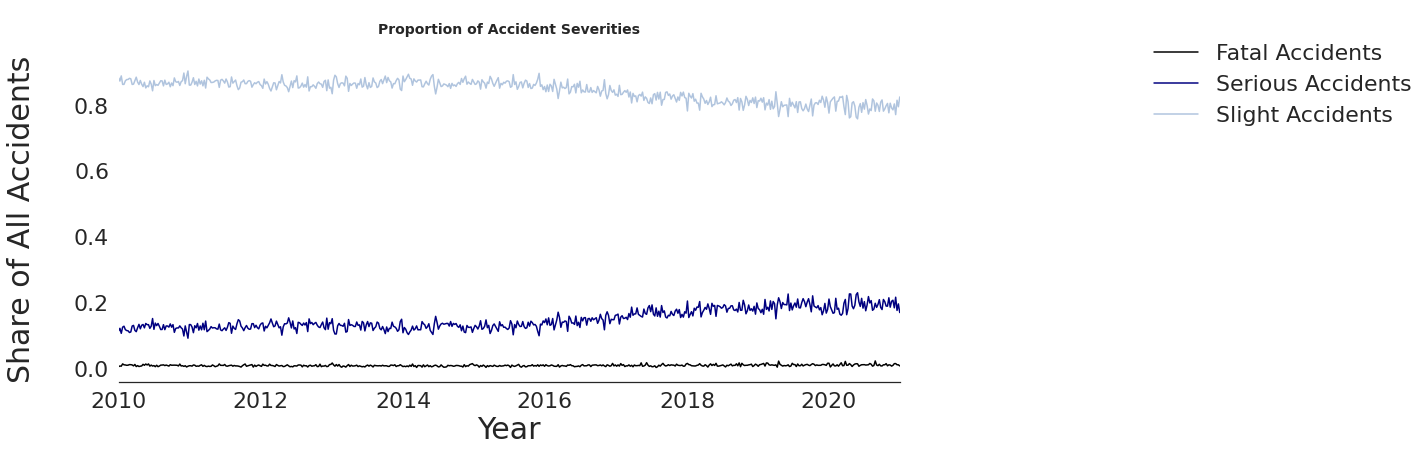

In [20]:
# prepare data
sub_df = fatalities_table[['fatal_percentage', 'serious_percentage', 'slight_percentage']]

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))
colors=['black', 'navy', 'lightsteelblue']

# plot
sub_df.plot(color=colors, ax=ax)
ax.set_title('\nProportion of Accident Severities\n', fontsize=14, fontweight='bold')
ax.set(ylabel='Share of All Accidents\n', xlabel='Year')
ax.legend(labels=['Fatal Accidents', 'Serious Accidents', 'Slight Accidents'], 
          bbox_to_anchor=(1.3, 1.1), frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=False);

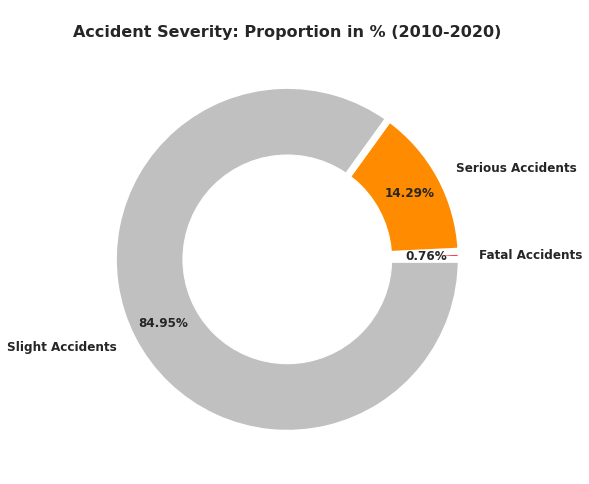

In [21]:
# assign the data
fatal   = acc_copy.accident_severity.value_counts()[1]
serious = acc_copy.accident_severity.value_counts()[2]
slight  = acc_copy.accident_severity.value_counts()[3]

names = ['Fatal Accidents','Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]
#explode = (0.2, 0, 0)

# create a pie chart
plt.pie(x=size, labels=names, colors=['red', 'darkorange', 'silver'], 
        autopct='%1.2f%%', pctdistance=0.8, textprops=dict(fontweight='bold', fontsize=12),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: Proportion in % (2010-2020)', fontsize=16, fontweight='bold')
plt.show();

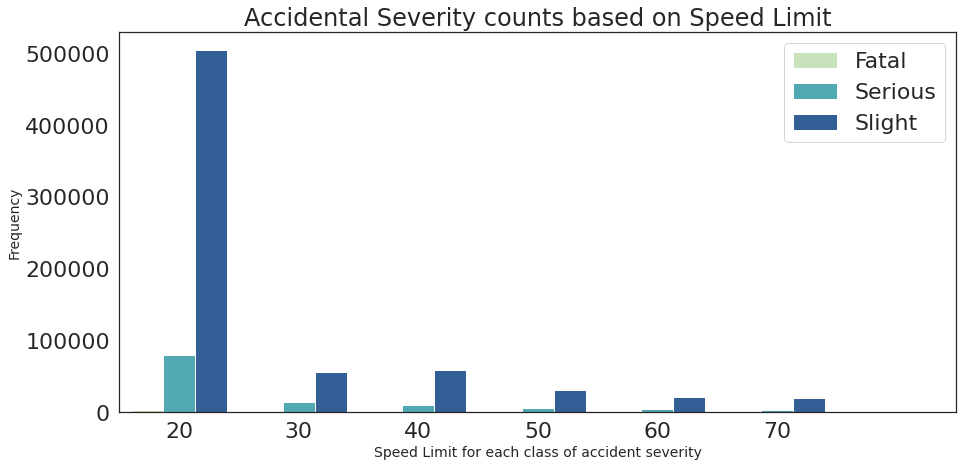

In [22]:
#Accidental Severity based on speed limit plot
plt.figure(figsize=(15,7))
ax = sns.countplot('speed_limit',hue='accident_severity',data=acc_copy, 
                   order = acc_copy["speed_limit"].value_counts().index, palette = "YlGnBu")
ax.set_xticklabels(['20','30','40',
                    '50',
                    '60','70'])
plt.legend(['Fatal','Serious','Slight'], loc='upper right')
plt.ylabel("Frequency", fontsize = 14)
plt.xlabel("Speed Limit for each class of accident severity", fontsize=14)
plt.title("Accidental Severity counts based on Speed Limit")
plt.show()

# Statistical Tests

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

Text(0.5, 1.0, 'Most Important Features')

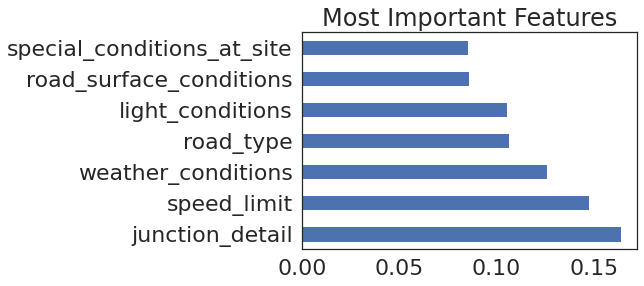

In [34]:
#Before performing statistical tests, using Random Forest Classifier to identify most important features out of the potential features earlier discussed
X = acc_copy[['road_type', 'speed_limit', 'junction_detail', 'junction_control', 'light_conditions',
              'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards',
              'urban_or_rural_area']]
y = acc_copy['accident_severity']

model = RandomForestClassifier()
model.fit(X, y)

(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(7)
   .plot(kind='barh')) 
plt.title('Most Important Features')

Since all the variables are categorical, hence performing chi-square analysis based on most important features plot against accident_severity

In [23]:
from scipy import stats

H0: Accident_Severity and Featured Variable are independent of each other i.e no relationship<br>
HA: Accident_Severity and Featured Variable has certain associativity.

alpha = 0.05<br>
If p value < 0.05 then, null hypothesis rejected, else accepted.

In [24]:
data_crosstab = pd.crosstab(acc['accident_severity'],
                            acc['junction_detail'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = acc['accident_severity'].unique()
columns = acc['junction_detail'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", '{0:.5f}'.format(chi_square), " and p value is:", '{0:.5f}'.format(p_value))
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", '{0:.5f}'.format(critical_value))
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 2768.39179  and p value is: 0.00000
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 2768.3917873865007  and critical value is: 23.68479
Null Hypothesis is rejected.


In [25]:
data_crosstab = pd.crosstab(acc['accident_severity'],
                            acc['weather_conditions'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = acc['accident_severity'].unique()
columns = acc['weather_conditions'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", '{0:.5f}'.format(chi_square), " and p value is:", '{0:.5f}'.format(p_value))
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", '{0:.5f}'.format(critical_value))
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 437.55467  and p value is: 0.00000
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 437.5546733443678  and critical value is: 23.68479
Null Hypothesis is rejected.


In [26]:
data_crosstab = pd.crosstab(acc['accident_severity'],
                            acc['road_surface_conditions'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = acc['accident_severity'].unique()
columns = acc['road_surface_conditions'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", '{0:.5f}'.format(chi_square), " and p value is:", '{0:.5f}'.format(p_value))
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", '{0:.5f}'.format(critical_value))
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 178.65573  and p value is: 0.00000
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 178.6557332266048  and critical value is: 15.50731
Null Hypothesis is rejected.


In [27]:
data_crosstab = pd.crosstab(acc['accident_severity'],
                            acc['light_conditions'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = acc['accident_severity'].unique()
columns = acc['light_conditions'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", '{0:.5f}'.format(chi_square), " and p value is:", '{0:.5f}'.format(p_value))
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", '{0:.5f}'.format(critical_value))
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 2284.72047  and p value is: 0.00000
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 2284.7204668749077  and critical value is: 15.50731
Null Hypothesis is rejected.


In [28]:
data_crosstab = pd.crosstab(acc['accident_severity'],
                            acc['speed_limit'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = acc['accident_severity'].unique()
columns = acc['speed_limit'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", '{0:.5f}'.format(chi_square), " and p value is:", '{0:.5f}'.format(p_value))
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", '{0:.5f}'.format(critical_value))
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 4630.13550  and p value is: 0.00000
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 4630.135501405096  and critical value is: 21.02607
Null Hypothesis is rejected.


In [29]:
data_crosstab = pd.crosstab(acc['accident_severity'],
                            acc['road_type'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = acc['accident_severity'].unique()
columns = acc['road_type'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", '{0:.5f}'.format(chi_square), " and p value is:", '{0:.5f}'.format(p_value))
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", '{0:.5f}'.format(critical_value))
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1806.28408  and p value is: 0.00000
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 1806.28408291237  and critical value is: 15.50731
Null Hypothesis is rejected.


In [30]:
data_crosstab = pd.crosstab(acc['accident_severity'],
                            acc['special_conditions_at_site'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = acc['accident_severity'].unique()
columns = acc['special_conditions_at_site'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", '{0:.5f}'.format(chi_square), " and p value is:", '{0:.5f}'.format(p_value))
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", '{0:.5f}'.format(critical_value))
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 238.86361  and p value is: 0.00000
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 238.8636056116682  and critical value is: 23.68479
Null Hypothesis is rejected.


From all the chi-square results of accident_severity with 7 most important features, it proves there is some relation between them.